In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Notebook-Extensions" data-toc-modified-id="Notebook-Extensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Extensions</a></span></li><li><span><a href="#Custom-CSS-for-the-notebook" data-toc-modified-id="Custom-CSS-for-the-notebook-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Custom CSS for the notebook</a></span></li><li><span><a href="#Creating-high-quality-inline-figures" data-toc-modified-id="Creating-high-quality-inline-figures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating high quality inline figures</a></span></li><li><span><a href="#Styling-Matplotlib-figures" data-toc-modified-id="Styling-Matplotlib-figures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Styling Matplotlib figures</a></span></li><li><span><a href="#Styling-how-Pandas-print-cells" data-toc-modified-id="Styling-how-Pandas-print-cells-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Styling how Pandas print cells</a></span></li><li><span><a href="#Auto-reload-files" data-toc-modified-id="Auto-reload-files-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Auto reload files</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
In this notebook I will go through how I have set up the styling and extensions for my Jupyter Notebooks. It should generally improve readability and quality-of-life for the Notebook user. The notebooks will describe the contents of the following files:
1. A `nbextension.config` file which contains a list of all the Notebook Extensions I use. The extension could be enabled using the extension manager, but I lake having it scripted.
1. A  file which contains the default setting for how figures are shown in the notebook. It's called `ipython_config.py` and should be placed in `~/.ipython/profile_default/`. I use it to increase the quality of the figures. 
1. A file that includes the CSS used to render the notebook. It is called  `custom.css` and should be placed in `~/.jupyter/custom/custom.css`. I use this file to set the width and alignment of the different kinds of cells.
1. A file that that changes the default parameters for matplotlib.pyplot. I have called it `my_mpl_style.mplstyle` and it should be placed in  `~/.config/matplotlib/stylelib/`  

Together these file form my customization of my Jupyter notebooks.

# Notebook Extensions
I use the following extensions
1. **ExecuteTime** -- This puts the runtime as well as a timestamp at the end of every cell that has been executed.
1. **autoreload** -- Allows me to have some module automatically reload. Handy when you can to keep some of your function outside the notebook, but still have the convenience of quick editing.
1. **Hinterland** -- Enable code autocompletion menu for every keypress in a code cell, instead of only enabling it with tab.
1. **Highlight selected word** -- As the name suggests it highlights all occurrences of the selected word.
1. **Table of content** -- This allows me include a table of content in the notebook.

# Custom CSS for the notebook
I love Jupyter Notebook, but there are some things about the default styling of the cells that I don't like, e.g. the figures are left-centered and the text fields are too wide. So I was quite happy to learn that Jupyter will use the following file if it exists: `~/.jupyter/custom/custom.css`.

```css
@import url("https://fonts.googleapis.com/css?family=Muli");

body {
  font-family: "Muli", sans-serif;
}

img {
  display: block;
  margin: auto;
}
```

# Creating high quality inline figures

I often save figures by drag-and-drop rather than running `fig.savefig()`. However, if you do that you will not get the benefits of the 

One can change the default setting for iPython. Running `ipython profile create` one can creates the file `~/.ipython/profile_default/ipython_config.py` that contains all the configs, see [this](https://gist.github.com/minrk/3301035). By adding `c.InlineBackend.figure_format = 'retina'` to the file, the resolution of the inline figures is improved greatly. This also means that the figures will have the same resolution if you save them by dragging.


# Styling Matplotlib figures
Below I define a function that creates a figure and returns the figure object so I can save the figure. I want to be able to compare the figures as I change the styling.

In [2]:
n_curves = 4
random_data = np.random.rand(100,n_curves)
sorted_data = [sorted(random_data[:,i]) for i in range(n_curves)]
def create_figure(sorted_data, fig_name):
    fig, ax = plt.subplots()
    for y in sorted_data: 
        ax.plot(y, label='label');
    ax.set_title("Title", loc='left')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.legend()
    fig.tight_layout()
    fig.savefig('../figs/'+fig_name)
    return fig

First I create the plain figure using the default styling that comes with MatplotLib.

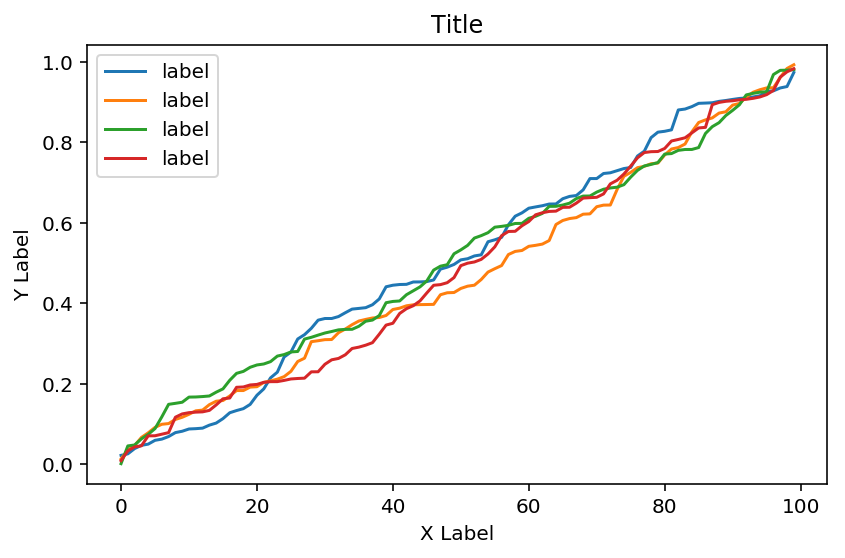

In [3]:
fig = create_figure(sorted_data, 'plain')

We want out figures to have a print quality, so we will set the figure format to retina. This should make the figure look a lot sharper.

We can alter the default parameters used by matplotlib by changing the values in the `plt.rcParams` dictionary.

Below I will change some of the styling:

In [4]:
# %load matplotlib_config.py
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False

Lets plot the figure again now that the defaults have ben changed.

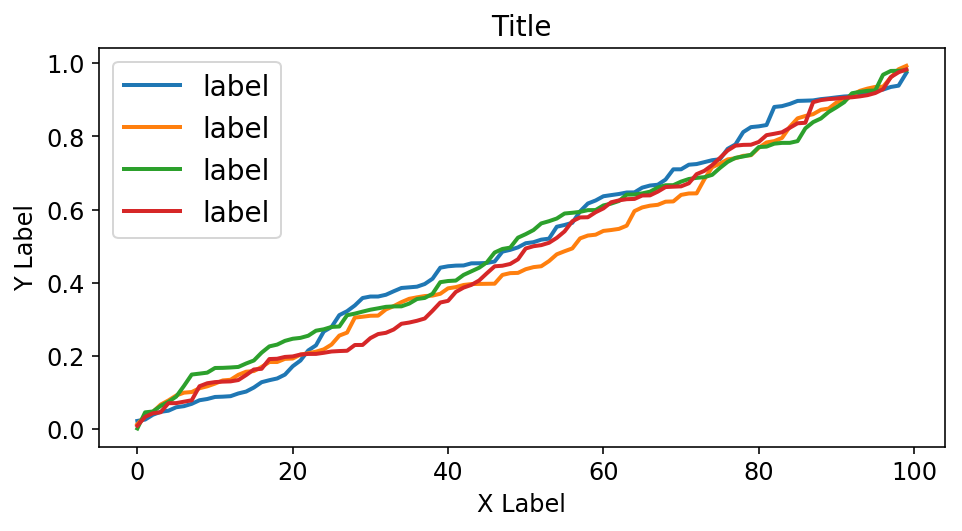

In [5]:
fig = create_figure(sorted_data, 'new_default_parameters')

Instead of including all the code above in every notebook one can write a style sheets as explained [here](https://matplotlib.org/users/style_sheets.html). All the style sheets provided by matplotlib can be found [here](https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib)

Lets see an example of a plot that uses the custom style defined in `my_mpl_style.mplstyle`. It should be placed in `~/.connfig/matplotlib/stylelib/`.

In [6]:
matplotlib.get_configdir()

'/Users/hartmann/.matplotlib'

In [7]:
matplotlib.matplotlib_fname()

'/Users/hartmann/.matplotlib/matplotlibrc'

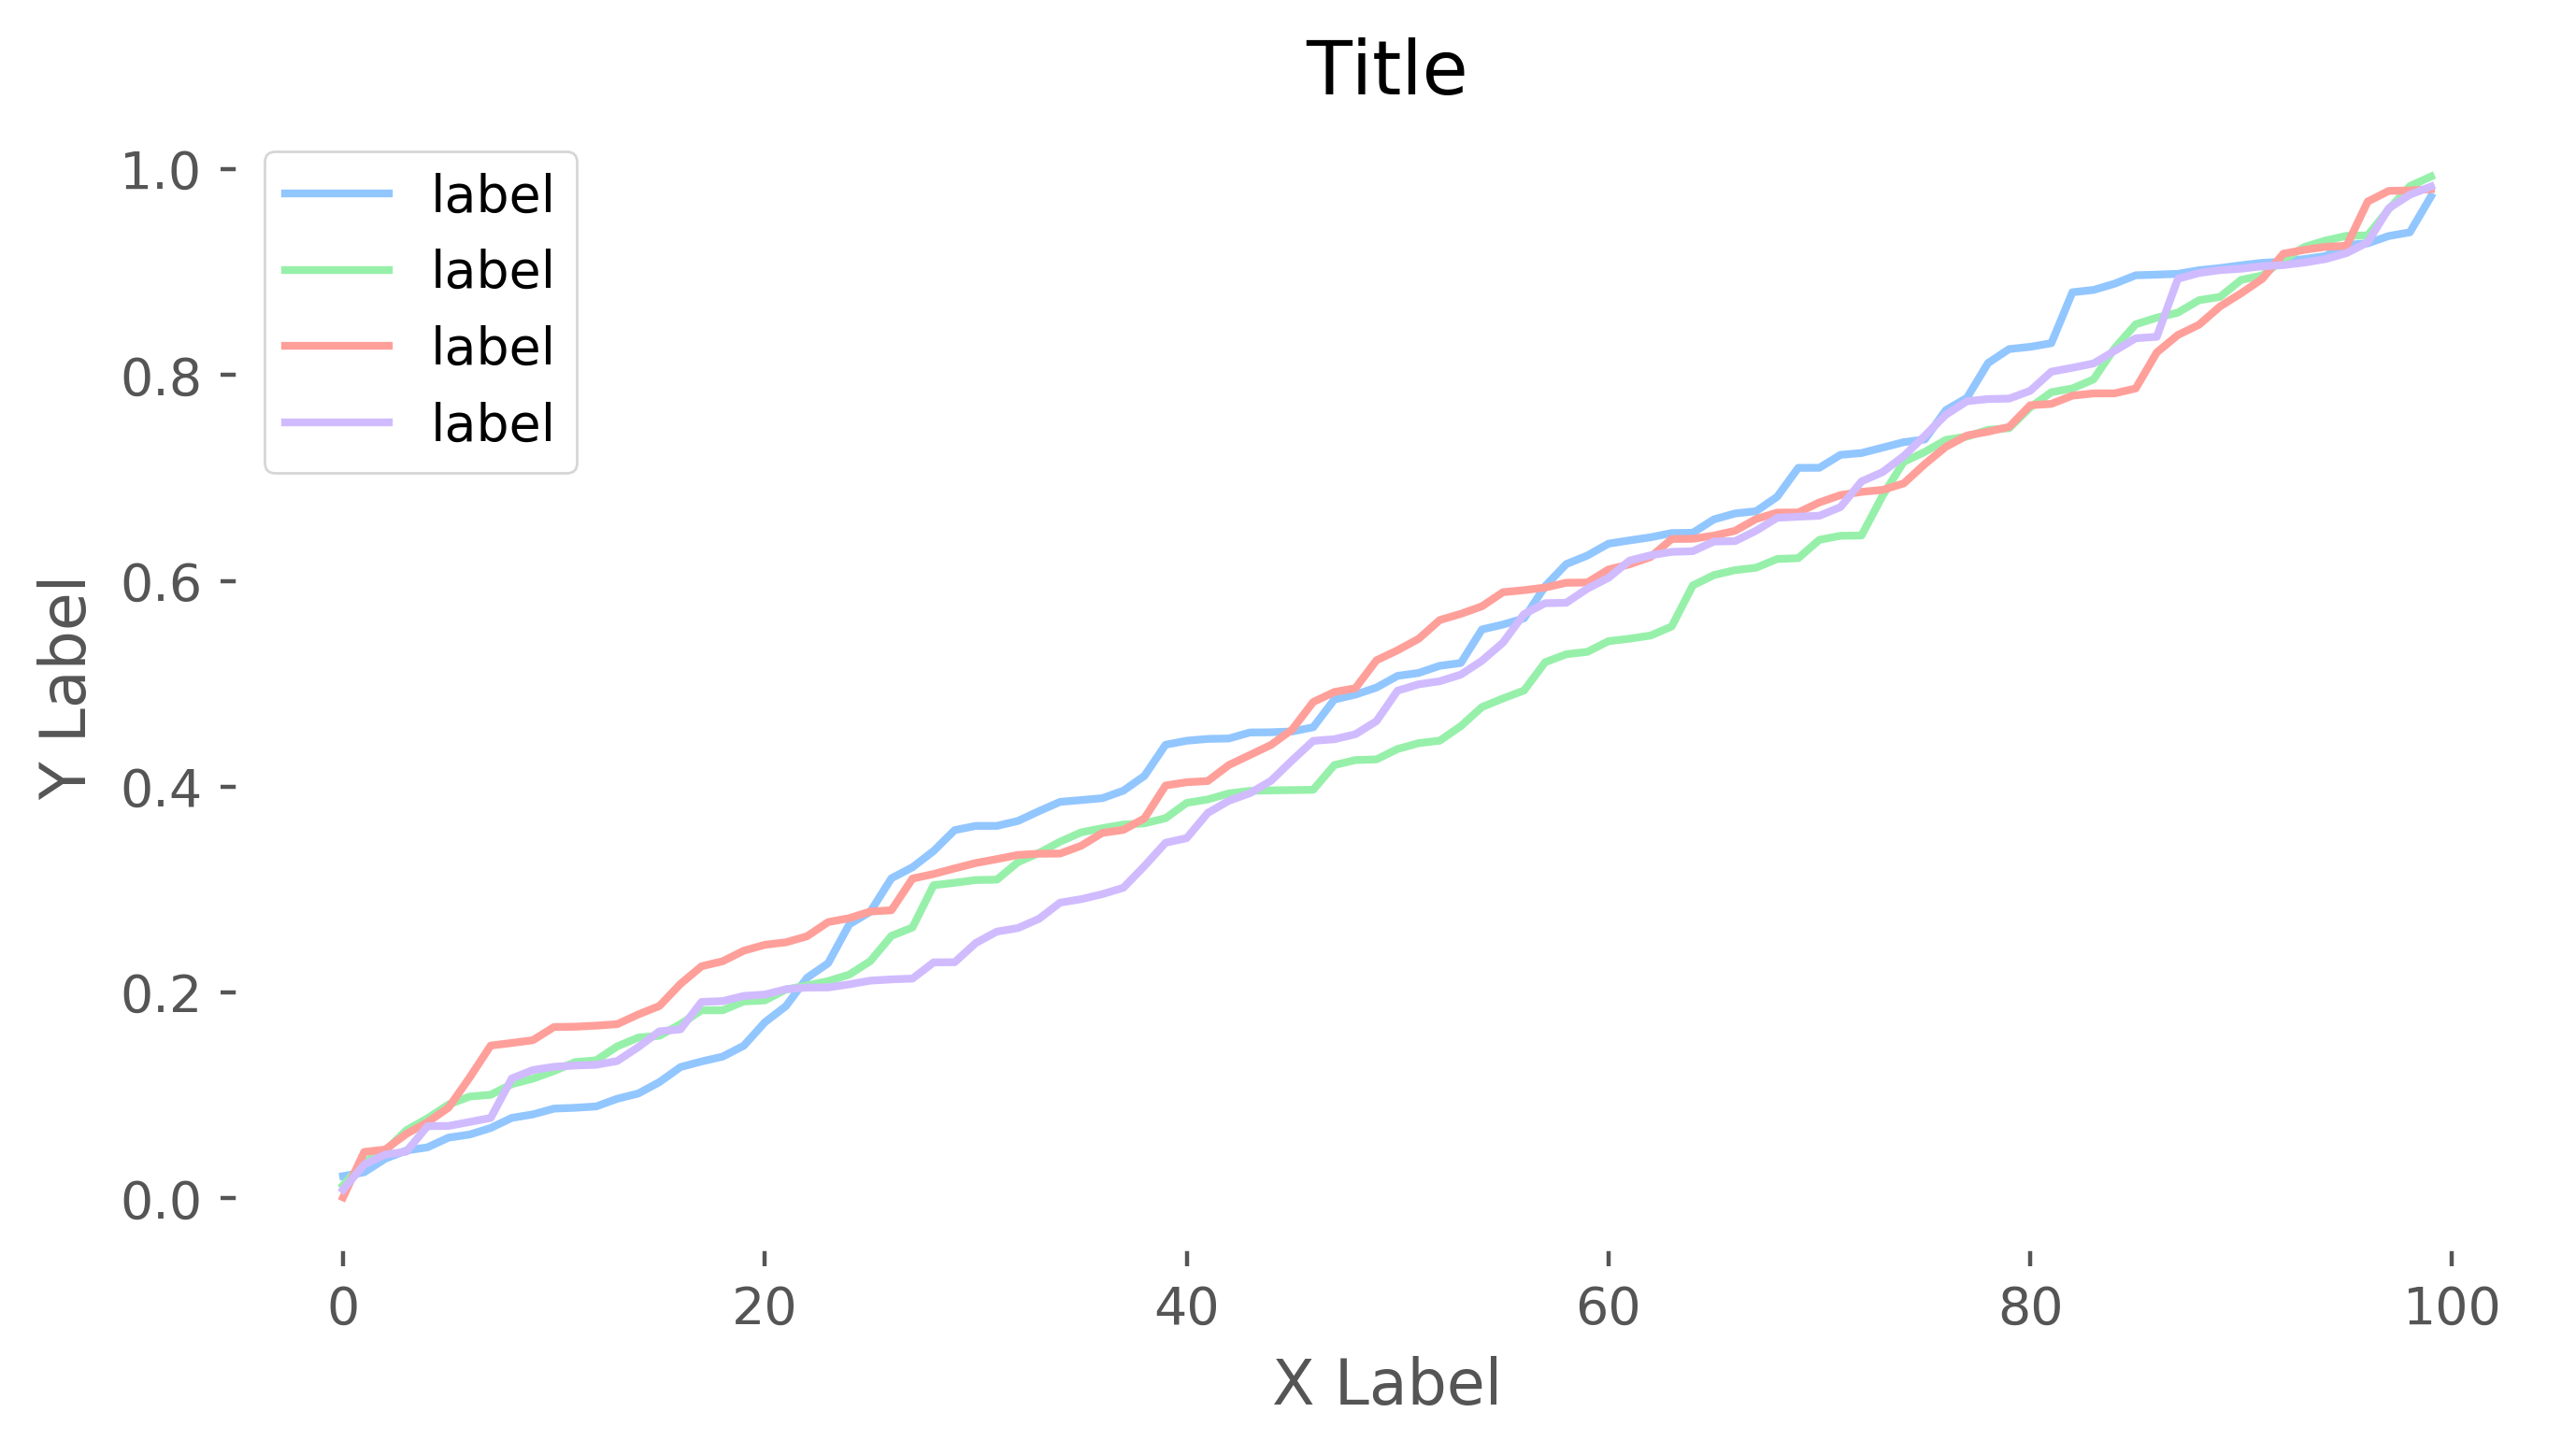

In [8]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.style.reload_library()
plt.style.use('my_mpl_style')
fig = create_figure(sorted_data, 'using_mpl_style')

# Auto reload files
Often I will be developing a python module while I'm writing the notebook. I will typically put functions for plotting or some pre-processing inside such a file. But this means that if I want to change I will have to manually reload the file. However, using the `autoreload` Notebook extension, I no longer have to worry about that

In [9]:
%load_ext autoreload
%autoreload 2
%aimport helperFunctions

In [10]:
helperFunctions.some_function()

Printing something.


I then change the file and run it again below:

In [11]:
with open("helperFunctions.py","a+") as f:
    f.write("\n    print('Now it is printing some more.')")
f.close()

Lets run it again.

In [12]:
helperFunctions.some_function()

Printing something.
Now it is printing some more.


Cool, right?

# Conclusion
I have shown how you customize you jupyter notebook by using three different config files and a CSS file. I hope you found it useful.

# References
I have found the following references useful when developing my customization.
1.  [Gerrit Gruben - Leveling up your Jupyter notebook skills](https://www.youtube.com/watch?v=b8g-8T0amuk&t=335s)
1.  [10 things you really should know about jupyter notebooks - Jakub Czakon](https://www.youtube.com/watch?v=FwUcJFSAfQw)
1.  [Make Jupyter/IPython Notebook even more magical with cell magic extensions!](https://www.youtube.com/watch?v=zxkdO07L29Q)
1.  [Style sheets in matplotlib](https://matplotlib.org/users/style_sheets.html)
